# Dataset 압축 해체

In [9]:
from google.colab import drive
drive.mount('/content/drive')
import os
import zipfile

local_zip = '/content/drive/My Drive/Colab_Notebooks/Deep_learning/archive.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Mounted at /content/drive


# Train dataset 개수

In [10]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
base_dir = '/tmp'
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'Test')

train_set = []
for i in range(43):
    train_set.append(os.path.join(train_dir,str(i)))
for i in range(43):
    print('total training',i,'images:', len(os.listdir(train_set[i])))

total training 0 images: 210
total training 1 images: 2220
total training 2 images: 2250
total training 3 images: 1410
total training 4 images: 1980
total training 5 images: 1860
total training 6 images: 420
total training 7 images: 1440
total training 8 images: 1410
total training 9 images: 1470
total training 10 images: 2010
total training 11 images: 1320
total training 12 images: 2100
total training 13 images: 2160
total training 14 images: 780
total training 15 images: 630
total training 16 images: 420
total training 17 images: 1110
total training 18 images: 1200
total training 19 images: 210
total training 20 images: 360
total training 21 images: 330
total training 22 images: 390
total training 23 images: 510
total training 24 images: 270
total training 25 images: 1500
total training 26 images: 600
total training 27 images: 240
total training 28 images: 540
total training 29 images: 270
total training 30 images: 450
total training 31 images: 780
total training 32 images: 240
total

# 데이터 불균형 해결 (Data Augmentation, Upsampling)

In [11]:
import random
import numpy as np
import os
import cv2
import glob
from PIL import Image
import PIL.ImageOps
def dataaugmentation(file_path,num):
    #다음 변수를 수정하여 새로 만들 이미지 갯수를 정합니다.
    num_augmented_images = num+1 - len(os.listdir(file_path))

    file_names = os.listdir(file_path)
    total_origin_image_num = len(file_names)
    augment_cnt = 1

    for i in range(1, num_augmented_images):
        change_picture_index = random.randrange(1, total_origin_image_num-1)
        file_name = file_names[change_picture_index]
        
        origin_image_path = file_path +'/'+ file_name
        image = Image.open(origin_image_path)
        random_augment = random.randrange(1,4)
        
        if(random_augment == 1):
            #이미지 좌우 반전
            inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
            inverted_image.save(file_path + '/inverted_' + str(augment_cnt) + '.png')
            
        elif(random_augment == 2):
            #이미지 기울이기
            rotated_image = image.rotate(random.randrange(-20, 20))
            rotated_image.save(file_path + '/rotated_' + str(augment_cnt) + '.png')
            
        elif(random_augment == 3):
            #노이즈 추가하기
            img = cv2.imread(origin_image_path)
            row,col,ch= img.shape
            mean = 0
            var = 0.1
            sigma = var**0.5
            gauss = np.random.normal(mean,sigma,(row,col,ch))
            gauss = gauss.reshape(row,col,ch)
            noisy_array = img + gauss
            noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
            noisy_image.save(file_path + '/noiseAdded_' + str(augment_cnt) + '.png')
            
        augment_cnt += 1

In [12]:
for i in range(43):
    dataaugmentation(train_set[i],2300)

In [13]:
for i in range(43):
    print('total training',i,'images:', len(os.listdir(train_set[i]))) 

total training 0 images: 2300
total training 1 images: 2300
total training 2 images: 2300
total training 3 images: 2300
total training 4 images: 2300
total training 5 images: 2300
total training 6 images: 2300
total training 7 images: 2300
total training 8 images: 2300
total training 9 images: 2300
total training 10 images: 2300
total training 11 images: 2300
total training 12 images: 2300
total training 13 images: 2300
total training 14 images: 2300
total training 15 images: 2300
total training 16 images: 2300
total training 17 images: 2300
total training 18 images: 2300
total training 19 images: 2300
total training 20 images: 2300
total training 21 images: 2300
total training 22 images: 2300
total training 23 images: 2300
total training 24 images: 2300
total training 25 images: 2300
total training 26 images: 2300
total training 27 images: 2300
total training 28 images: 2300
total training 29 images: 2300
total training 30 images: 2300
total training 31 images: 2300
total training 32 

# Validation Dataset 생성 (Train 2300 중 500 사용)

In [14]:
!mkdir '/tmp/Val'
!mkdir '/tmp/Val/0'
!mkdir '/tmp/Val/1'
!mkdir '/tmp/Val/2'
!mkdir '/tmp/Val/3'
!mkdir '/tmp/Val/4'
!mkdir '/tmp/Val/5'
!mkdir '/tmp/Val/6'
!mkdir '/tmp/Val/7'
!mkdir '/tmp/Val/8'
!mkdir '/tmp/Val/9'
!mkdir '/tmp/Val/10'
!mkdir '/tmp/Val/11'
!mkdir '/tmp/Val/12'
!mkdir '/tmp/Val/13'
!mkdir '/tmp/Val/14'
!mkdir '/tmp/Val/15'
!mkdir '/tmp/Val/16'
!mkdir '/tmp/Val/17'
!mkdir '/tmp/Val/18'
!mkdir '/tmp/Val/19'
!mkdir '/tmp/Val/20'
!mkdir '/tmp/Val/21'
!mkdir '/tmp/Val/22'
!mkdir '/tmp/Val/23'
!mkdir '/tmp/Val/24'
!mkdir '/tmp/Val/25'
!mkdir '/tmp/Val/26'
!mkdir '/tmp/Val/27'
!mkdir '/tmp/Val/28'
!mkdir '/tmp/Val/29'
!mkdir '/tmp/Val/30'
!mkdir '/tmp/Val/31'
!mkdir '/tmp/Val/32'
!mkdir '/tmp/Val/33'
!mkdir '/tmp/Val/34'
!mkdir '/tmp/Val/35'
!mkdir '/tmp/Val/36'
!mkdir '/tmp/Val/37'
!mkdir '/tmp/Val/38'
!mkdir '/tmp/Val/39'
!mkdir '/tmp/Val/40'
!mkdir '/tmp/Val/41'
!mkdir '/tmp/Val/42'
!ls /tmp/Val
val_dir = os.path.join(base_dir, 'Val')

0   11	14  17	2   22	25  28	30  33	36  39	41  6  9
1   12	15  18	20  23	26  29	31  34	37  4	42  7
10  13	16  19	21  24	27  3	32  35	38  40	5   8


In [15]:
val_set = []
for i in range(43):
    val_set.append(os.path.join(val_dir,str(i)))

In [16]:
import random
import shutil
for i in range(43):
    a = os.listdir(train_set[i])
    random.shuffle(a)   
    for j in range(500):     
        shutil.move(train_set[i]+'/'+a[j],val_set[i])

In [17]:
for i in range(43):
    print('total validation',i,'images:', len(os.listdir(val_set[i])))
for i in range(43):
    print('total training',i,'images:', len(os.listdir(train_set[i])))

total validation 0 images: 500
total validation 1 images: 500
total validation 2 images: 500
total validation 3 images: 500
total validation 4 images: 500
total validation 5 images: 500
total validation 6 images: 500
total validation 7 images: 500
total validation 8 images: 500
total validation 9 images: 500
total validation 10 images: 500
total validation 11 images: 500
total validation 12 images: 500
total validation 13 images: 500
total validation 14 images: 500
total validation 15 images: 500
total validation 16 images: 500
total validation 17 images: 500
total validation 18 images: 500
total validation 19 images: 500
total validation 20 images: 500
total validation 21 images: 500
total validation 22 images: 500
total validation 23 images: 500
total validation 24 images: 500
total validation 25 images: 500
total validation 26 images: 500
total validation 27 images: 500
total validation 28 images: 500
total validation 29 images: 500
total validation 30 images: 500
total validation 3

# Inception V3

In [20]:
from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
import numpy as np

base_model = MobileNet(weights='imagenet',input_shape=(224,224,3))
# base_model.summary()

x = base_model.get_layer('reshape_2').output
# Create output layer with a single node and sigmoid activation
output = layers.Dense(43, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [23]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['acc'])

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 16 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use Categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# test_generator = val_datagen.flow_from_directory(
#         test_dir,
#         target_size=(50, 50),
#         batch_size=20,
#         class_mode='categorical')

# Flow test images in batches of 20 using test_datagen generator
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 77400 images belonging to 43 classes.
Found 21500 images belonging to 43 classes.


In [25]:
history = model.fit_generator(
      train_generator,
      epochs=7,
      validation_data=val_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/7
 264/2419 [==>...........................] - ETA: 4:42:59 - loss: 1.3809 - acc: 0.7298

KeyboardInterrupt: ignored

# Resnet50

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

base_model = ResNet50(weights='imagenet', input_tensor=Input(shape=(50, 50, 3)))
#base_model.summary()

x = base_model.get_layer('avg_pool').output
# Create output layer with a single node and sigmoid activation
output = layers.Dense(43, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.summary()

102973440/102967424 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50, 50, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 56, 56, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 25, 25, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 25, 25, 64)   256         conv1_conv[0][0]                 
___________________________

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 16 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(50, 50),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use Categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

test_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(50, 50),
        batch_size=20,
        class_mode='categorical')

# Flow test images in batches of 20 using test_datagen generator
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(50, 50),
        batch_size=20,
        class_mode='categorical')

Found 77400 images belonging to 43 classes.
Found 0 images belonging to 0 classes.
Found 21500 images belonging to 43 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      epochs=7,
      validation_data=val_generator)

In [ ]:
result = model.predict(train_generator)

In [ ]:
result = model.predict(test_generator)

ValueError: ignored

In [33]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#####################################################
## plot utility functions
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training Accuracy")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation Accuracy")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([0, 8, 0, 1])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Accuarcy")
    plt.grid(True)

def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)

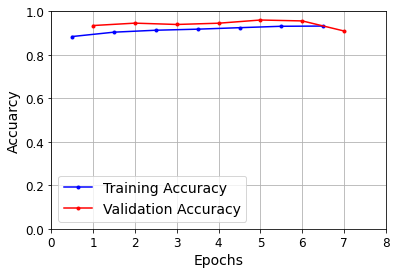

In [34]:
loss = [0.3334, 0.2779, 0.2554, 0.2435, 0.2264, 0.2078, 0.2097]
val_loss = [0.1745, 0.1480, 0.1663, 0.1390, 0.1116, 0.1267, 0.3152]
acc = [0.8842, 0.9043, 0.9132, 0.9181, 0.9249, 0.9314, 0.9324]
val_acc = [0.9348, 0.9458, 0.9397, 0.9455, 0.9602, 0.9560, 0.9096]
plot_learning_curves(acc,val_acc)
plt.show()

In [ ]:
!rm /tmp/Test/GT-final_test.csv

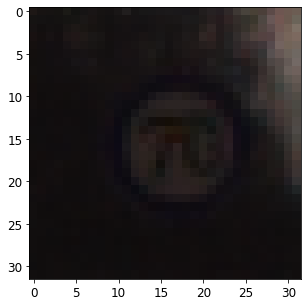

In [ ]:
import os
import cv2

file_list = os.listdir(test_dir)
 
img_name = test_dir + '/' + file_list[6]
img = cv2.imread(img_name, cv2.IMREAD_COLOR)
plt.figure(figsize=(5,5))
plt.imshow(img)

In [ ]:
result = model.predict(img_name)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


IndexError: ignored

In [ ]:
# Import necessary packages
import argparse

# Import necessary components to build LeNet
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

def alexnet_model(img_shape=(224, 224, 3), n_classes=10, l2_reg=0.,
	weights=None):

	# Initialize model
	alexnet = Sequential()

	# Layer 1
	alexnet.add(Conv2D(96, (11, 11), input_shape=img_shape,
		padding='same', kernel_regularizer=l2(l2_reg)))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 2
	alexnet.add(Conv2D(256, (5, 5), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 3
	alexnet.add(ZeroPadding2D((1, 1)))
	alexnet.add(Conv2D(512, (3, 3), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 4
	alexnet.add(ZeroPadding2D((1, 1)))
	alexnet.add(Conv2D(1024, (3, 3), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))

	# Layer 5
	alexnet.add(ZeroPadding2D((1, 1)))
	alexnet.add(Conv2D(1024, (3, 3), padding='same'))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(MaxPooling2D(pool_size=(2, 2)))

	# Layer 6
	alexnet.add(Flatten())
	alexnet.add(Dense(3072))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(Dropout(0.5))

	# Layer 7
	alexnet.add(Dense(4096))
	alexnet.add(BatchNormalization())
	alexnet.add(Activation('relu'))
	alexnet.add(Dropout(0.5))

	# Layer 8
	alexnet.add(Dense(n_classes))
	alexnet.add(BatchNormalization())
	#alexnet.add(Activation('softmax'))
	alexnet.add(Activation('sigmoid'))

	if weights is not None:
		alexnet.load_weights(weights)

	return alexnet

In [ ]:
# Create AlexNet model
model = alexnet_model(img_shape=(50, 50, 3), n_classes=43)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 50, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 50, 50, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 25, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 25, 25, 256)       0